In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from konlpy.tag import Okt
from nltk import Text
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
okt = Okt()

## 2022년 1월 국내여행지 언급량

In [3]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 184): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-01-01&endDate=2022-01-31&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


In [54]:
df = pd.read_csv('./2022_전국_방문자_수.csv')
l = []
for i in df['기초지자체명']:
    l.append(i)

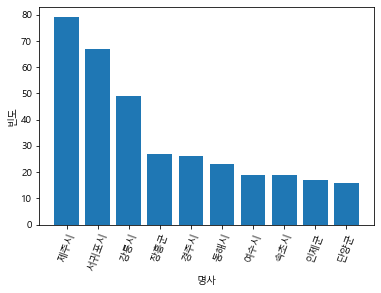

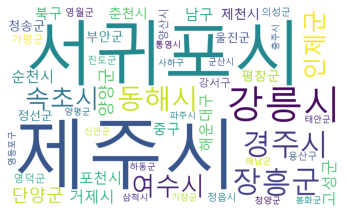

In [50]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [64]:
Okt.vocab().most_common(150)

[('제주시', 79),
 ('서귀포시', 67),
 ('강릉시', 49),
 ('장흥군', 27),
 ('경주시', 26),
 ('동해시', 23),
 ('여수시', 19),
 ('속초시', 19),
 ('인제군', 17),
 ('단양군', 16),
 ('양양군', 14),
 ('고성군', 13),
 ('거제시', 12),
 ('해운대구', 11),
 ('남구', 11),
 ('포천시', 11),
 ('순천시', 11),
 ('북구', 10),
 ('중구', 10),
 ('평창군', 9),
 ('제천시', 9),
 ('춘천시', 9),
 ('부안군', 8),
 ('청송군', 8),
 ('정선군', 7),
 ('울진군', 7),
 ('가평군', 6),
 ('양산시', 6),
 ('강서구', 6),
 ('영덕군', 6),
 ('정읍시', 5),
 ('용산구', 5),
 ('영월군', 5),
 ('진도군', 5),
 ('의성군', 5),
 ('신안군', 4),
 ('청양군', 4),
 ('삼척시', 4),
 ('기장군', 4),
 ('사하구', 4),
 ('태안군', 4),
 ('봉화군', 4),
 ('하동군', 4),
 ('영등포구', 4),
 ('양평군', 4),
 ('해남군', 4),
 ('파주시', 4),
 ('군산시', 4),
 ('통영시', 4),
 ('충주시', 4),
 ('진주시', 4),
 ('장성군', 4),
 ('광양시', 3),
 ('원주시', 3),
 ('영주시', 3),
 ('밀양시', 3),
 ('창녕군', 3),
 ('의정부시', 3),
 ('울주군', 3),
 ('서구', 3),
 ('김해시', 3),
 ('울릉군', 3),
 ('강화군', 3),
 ('노원구', 3),
 ('동구', 3),
 ('영광군', 3),
 ('성북구', 3),
 ('안동시', 2),
 ('서산시', 2),
 ('홍천군', 2),
 ('화성시', 2),
 ('청도군', 2),
 ('영도구', 2),
 ('부산진구', 2),
 ('동두천시', 2),
 ('연천

In [65]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("1월 지역 언급량.csv")

## 2022년 2월 국내여행지 언급량

In [67]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 168): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-02-01&endDate=2022-02-28&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


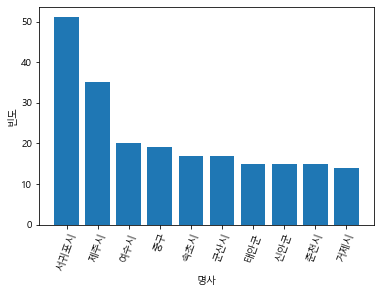

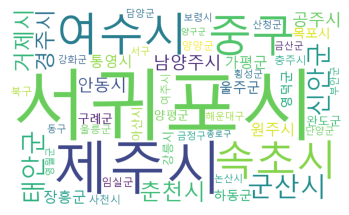

In [68]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [69]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("2월 지역 언급량.csv")

## 2022년 3월 국내여행지 언급량

In [5]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 170): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-03-01&endDate=2022-03-31&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


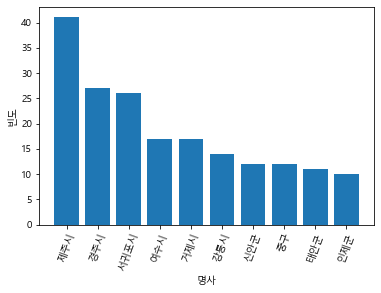

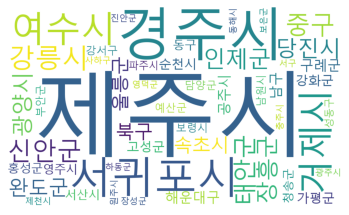

In [7]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [10]:
Okt.vocab().most_common(150)

[('제주시', 41),
 ('경주시', 27),
 ('서귀포시', 26),
 ('여수시', 17),
 ('거제시', 17),
 ('강릉시', 14),
 ('신안군', 12),
 ('중구', 12),
 ('태안군', 11),
 ('인제군', 10),
 ('장흥군', 10),
 ('광양시', 9),
 ('당진시', 9),
 ('완도군', 8),
 ('속초시', 7),
 ('북구', 7),
 ('울릉군', 7),
 ('해운대구', 7),
 ('구례군', 7),
 ('공주시', 7),
 ('남구', 7),
 ('가평군', 6),
 ('강화군', 6),
 ('순천시', 6),
 ('고성군', 6),
 ('홍성군', 5),
 ('서산시', 5),
 ('영주시', 5),
 ('동구', 5),
 ('청송군', 5),
 ('예산군', 4),
 ('보령시', 4),
 ('담양군', 4),
 ('강서구', 4),
 ('부안군', 4),
 ('남원시', 4),
 ('파주시', 4),
 ('성동구', 4),
 ('하동군', 3),
 ('장성군', 3),
 ('제천시', 3),
 ('충주시', 3),
 ('사하구', 3),
 ('영덕군', 3),
 ('동해시', 3),
 ('원주시', 3),
 ('진안군', 3),
 ('광주시', 3),
 ('보은군', 3),
 ('서구', 3),
 ('진도군', 3),
 ('나주시', 3),
 ('시흥시', 3),
 ('고창군', 2),
 ('단양군', 2),
 ('논산시', 2),
 ('수성구', 2),
 ('춘천시', 2),
 ('김포시', 2),
 ('통영시', 2),
 ('화순군', 2),
 ('강남구', 2),
 ('마포구', 2),
 ('철원군', 2),
 ('사천시', 2),
 ('양양군', 2),
 ('수영구', 2),
 ('평창군', 2),
 ('유성구', 2),
 ('강진군', 2),
 ('정읍시', 2),
 ('연제구', 2),
 ('남동구', 2),
 ('임실군', 2),
 ('달서구', 2),
 ('무주군', 2),
 ('영

In [12]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("3월 지역 언급량.csv", encoding = 'cp949')

## 2022년 4월 국내여행지 언급량

In [17]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 201): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-04-01&endDate=2022-04-30&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


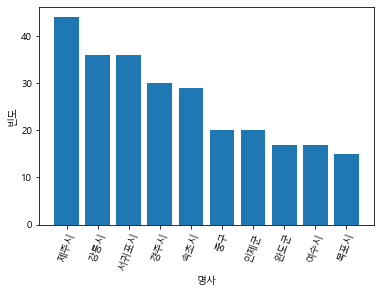

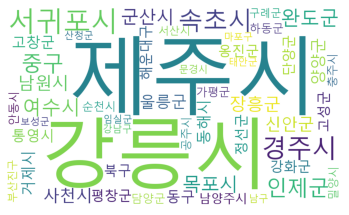

In [18]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [20]:
Okt.vocab().most_common(160)

[('제주시', 44),
 ('강릉시', 36),
 ('서귀포시', 36),
 ('경주시', 30),
 ('속초시', 29),
 ('중구', 20),
 ('인제군', 20),
 ('완도군', 17),
 ('여수시', 17),
 ('목포시', 15),
 ('군산시', 14),
 ('남원시', 13),
 ('장흥군', 13),
 ('사천시', 12),
 ('신안군', 12),
 ('울릉군', 11),
 ('양양군', 11),
 ('거제시', 10),
 ('동해시', 10),
 ('고창군', 9),
 ('통영시', 9),
 ('동구', 9),
 ('평창군', 8),
 ('단양군', 8),
 ('강화군', 8),
 ('옹진군', 8),
 ('해운대구', 8),
 ('정선군', 8),
 ('고성군', 8),
 ('북구', 8),
 ('남양주시', 8),
 ('순천시', 7),
 ('담양군', 7),
 ('하동군', 7),
 ('밀양시', 7),
 ('충주시', 7),
 ('가평군', 7),
 ('공주시', 7),
 ('안동시', 7),
 ('구례군', 6),
 ('서산시', 6),
 ('부산진구', 6),
 ('임실군', 5),
 ('보성군', 5),
 ('태안군', 5),
 ('산청군', 5),
 ('문경시', 5),
 ('남구', 5),
 ('강남구', 5),
 ('마포구', 5),
 ('완주군', 4),
 ('안성시', 4),
 ('합천군', 4),
 ('서구', 4),
 ('달성군', 4),
 ('당진시', 4),
 ('괴산군', 4),
 ('용산구', 4),
 ('수영구', 4),
 ('부여군', 4),
 ('서초구', 3),
 ('금산군', 3),
 ('옥천군', 3),
 ('사하구', 3),
 ('보령시', 3),
 ('울진군', 3),
 ('나주시', 3),
 ('종로구', 3),
 ('영도구', 3),
 ('정읍시', 3),
 ('곡성군', 3),
 ('예산군', 3),
 ('시흥시', 2),
 ('창녕군', 2),
 ('광양시', 2),
 ('무주군'

In [21]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("4월 지역 언급량.csv", encoding = 'cp949')

## 2022년 5월 국내여행지 언급량

In [24]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 250): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-05-01&endDate=2022-05-31&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


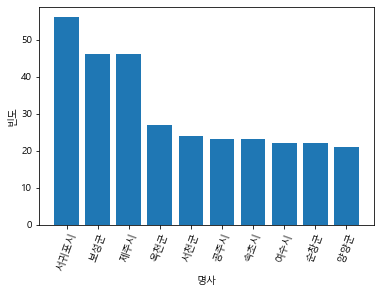

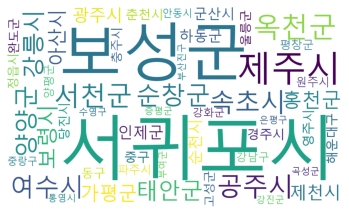

In [25]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [26]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("5월 지역 언급량.csv", encoding = 'cp949')

## 2022년 6월 국내여행지 언급량

In [51]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 244): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-06-01&endDate=2022-06-30&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


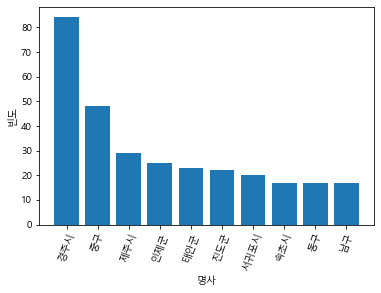

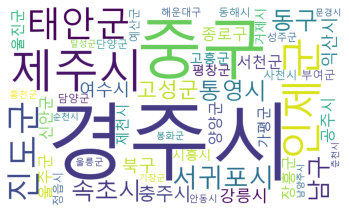

In [62]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [65]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("6월 지역 언급량.csv", encoding = 'cp949')

## 2022년 7월 국내여행지 언급량

In [66]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 266): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-07-01&endDate=2022-07-31&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


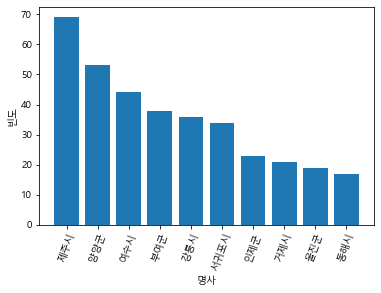

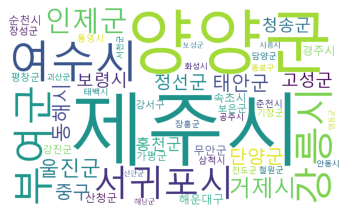

In [67]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [68]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("7월 지역 언급량.csv", encoding = 'cp949')

## 2022년 8월 국내여행지 언급량

In [69]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 240): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-08-01&endDate=2022-08-31&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


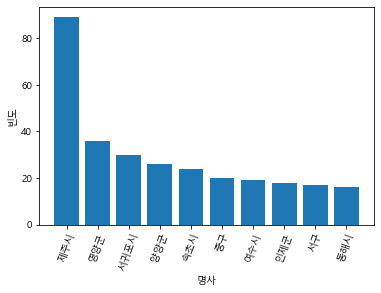

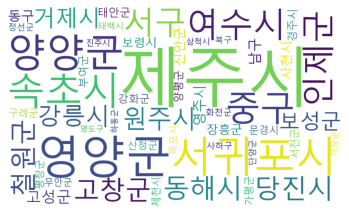

In [70]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [71]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("8월 지역 언급량.csv", encoding = 'cp949')

## 2022년 9월 국내여행지 언급량

In [72]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 232): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-09-01&endDate=2022-09-30&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


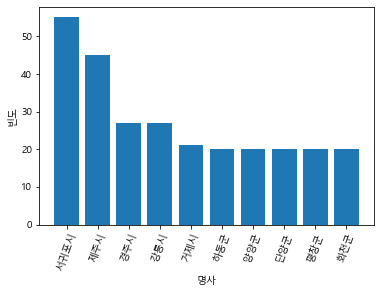

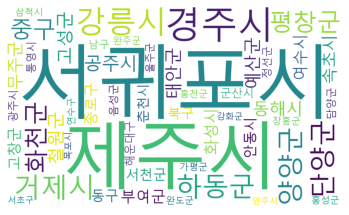

In [73]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [74]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("9월 지역 언급량.csv", encoding = 'cp949')

## 2022년 10월 국내여행지 언급량

In [75]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 230): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-10-01&endDate=2022-10-31&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


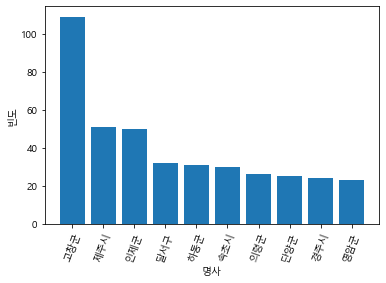

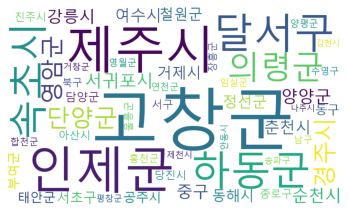

In [76]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [77]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("10월 지역 언급량.csv", encoding = 'cp949')

## 2022년 11월 국내여행지 언급량

In [78]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 231): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-11-01&endDate=2022-11-30&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


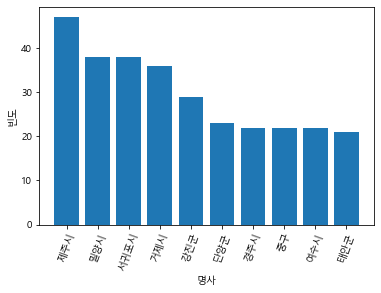

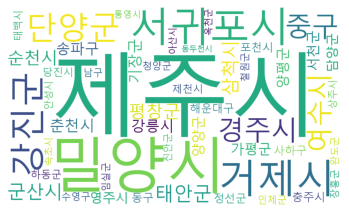

In [79]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [80]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("11월 지역 언급량.csv", encoding = 'cp949')

## 2022년 12월 국내여행지 언급량

In [81]:
driver = webdriver.Chrome()
url_list = []
content_list = ""
text = "국내여행지"

for i in range(1, 212): 
    url = 'https://section.blog.naver.com/Search/Post.naver?pageNo=' + str(i) + '&rangeType=PERIOD&orderBy=sim&startDate=2022-12-01&endDate=2022-12-31&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    
    for j in range(1, 8): 
        titles = driver.find_element(By.XPATH,'/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)

print("url 수집 끝, 해당 url 데이터 크롤링 성공")

for url in url_list:
    driver.get(url)
    
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements(By.CSS_SELECTOR, overlays)
 
    for content in contents:
        content_list = content_list + content.text # content_list 라는 값에 + 하면서 점점 누적

url 수집 끝, 해당 url 데이터 크롤링 성공


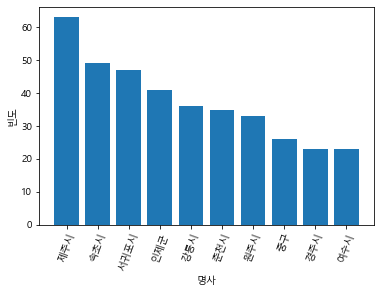

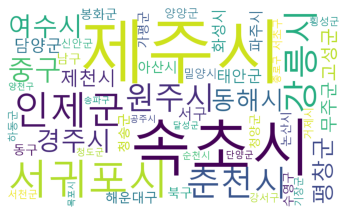

In [82]:
myList = okt.nouns(content_list)

for i in myList[:]:
    if i not in l:
        myList.remove(i)
        
Okt = Text(myList, name="Okt")

# 그래프에서 한글이 출력이 안되는 문제 해결 (ㅁㅁㅁ 처럼 출력됨)
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
 
# 그래프 x, y 라벨 설정
plt.xlabel("명사")
plt.ylabel("빈도")
 
# 그래프에서 x, y 값을 설정
wordInfo = dict()
for tags, counts in Okt.vocab().most_common(10):
    if(len(str(tags)) > 0):
        wordInfo[tags] = counts
 
values = sorted(wordInfo.values(), reverse=True)
keys = sorted(wordInfo, key=wordInfo.get, reverse=True)
 
# 그래프 값 설정
plt.bar(range(len(wordInfo)), values, align='center')
plt.xticks(range(len(wordInfo)), list(keys), rotation='70')
plt.show()
# plt.savefig('강남구_키워드_분석_1.png', facecolor='#eeeeee')
 
 
# wordCloud 출력
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_location, max_words=50)
plt.imshow(wc.generate_from_frequencies(Okt.vocab()))
plt.axis("off")
plt.show()
# plt.savefig('강남구_키워드_분석_2.png')

In [83]:
df = pd.DataFrame(Okt.vocab().most_common(150) , columns=['지역', '언급수'])
df.to_csv("12월 지역 언급량.csv", encoding = 'cp949')

In [84]:
print('a')

a


In [85]:
# print('c')

In [86]:
print('d')

d
